<a href="https://colab.research.google.com/github/carolvieirav/Deep-Learning-Deep-Learn/blob/main/DeepLearn_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar Tensorflow e importar Dataset do Mnist

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test,y_test) = mnist.load_data()


Após importar dados para uma Rede Neural é necessário normalizar esses dados.

In [2]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Construção do Modelo



Primeira camada é de imput do modelo

In [7]:
model = tf.keras.models.Sequential()# Modelo sequencial feedfoward
model.add(tf.keras.layers.Flatten())

Camadas escondidas:

In [10]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Parâmetros dentro da camada 'Dense': Número de unidades dentro da camada
# e afunção de ativação. default = relu.

Camada de Output

In [11]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
# essa camada é uma distribuição de probabilidade
# a função de ativação default pra esse caso é Sofmax

## Parâmetros para Treinar o Modelo

In [12]:
model.compile(optimizer='adam', # default optimazer
              loss='sparse_categorical_crossentropy', # mais popular
              metrics=['accuracy'])

# uma rede neural visa reduzir a métrica de erro(loss)
# em vez de aumentar acurácia

## Treinar Modelo

In [13]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4919 - accuracy: 0.8331
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1309 - accuracy: 0.9625
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0902 - accuracy: 0.9746


## Calcular o Erro e Acurácia

In [14]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1178 - accuracy: 0.9663
0.1178470104932785 0.9663000106811523


## Salvar

In [15]:
model.save('epic_num_reade.model')

INFO:tensorflow:Assets written to: epic_num_reade.model/assets


In [17]:
new_model =  tf.keras.models.load_model("epic_num_reade.model") #ler o modelo

In [18]:
PREDICTIONS =  new_model.predict([x_test])

In [23]:
import numpy as np
import matplotlib.pyplot as plt

print(np.argmax(PREDICTIONS[0]))

7


<function matplotlib.pyplot.show>

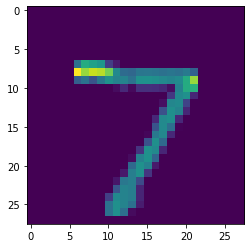

In [24]:
plt.imshow(x_test[0])
plt.show
#visualizar 